# Predicción de Ingresos



## Librerías a utilizar

In [93]:
%matplotlib inline

# Librerias 
import numpy as np # Libreria para algebra lineal.
import pandas as pd # Procesamiento de datos , archivos CSV (i.d. pd.read_csv)

import matplotlib.pyplot as plt # visualización de los datos  mediante grafícos.
import seaborn as sns # Extensión  y mejora en la visualización de los grafícos.

# Librerias selección de los datos
from sklearn.model_selection import train_test_split


# Librerias Feature engineering
from  sklearn.preprocessing import OneHotEncoder

from  sklearn.pipeline import Pipeline
from  sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.compose import ColumnTransformer

# Librerias de Modelos 
from sklearn.linear_model import SGDClassifier


from sklearn.model_selection import cross_val_score


# Librerias de las metricas
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, SCORERS


# Librerias para refinar el modelo (Hiperparametros)
from sklearn.model_selection import RandomizedSearchCV



# Data Set

In [94]:
dfingresos = pd.read_csv('ingresos.csv') # lectura del data set

dfingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Notamos que la variable `income` a predecir es de tipo `object`( mezcla de string y numeros ) y que los valores no nulos corresponden a 48842 para cada variable.

In [95]:
dfingresos.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [96]:
dfingresos.describe().T # Descripción estadistica de las variables númericas; T corresponde a la Transpuesta.

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [97]:
data = dfingresos.copy() # copia de seguridad

#conv  = {'<=50K': 0, '>50K': 1}
#data['tramoClass'] = data['income'].map(conv)

In [98]:
var_object = data.select_dtypes(["object"]).columns
var_numerical = data.select_dtypes(["int"]).columns

var_numerical

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [99]:
var_object

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

# Análisis Exploratorio de los Datos

Primero mostramos cuantos ingresos hay  en cada intervalo. Vemos que la mayoria de los ingresos están en el intervalo `<=50K`. Esto indica que un sub set de datos Balanciados es más adecuado para entrenar el modelo.

<AxesSubplot:xlabel='income', ylabel='count'>

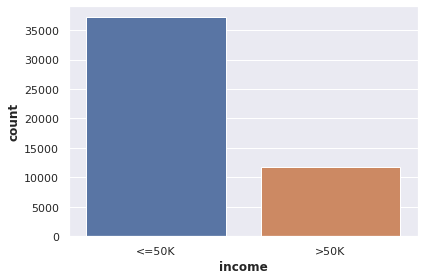

In [100]:
sns.countplot(x="income", data=data )

### Variables Numéricas

Histograma para cada una de las variables numéricas.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'educational-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

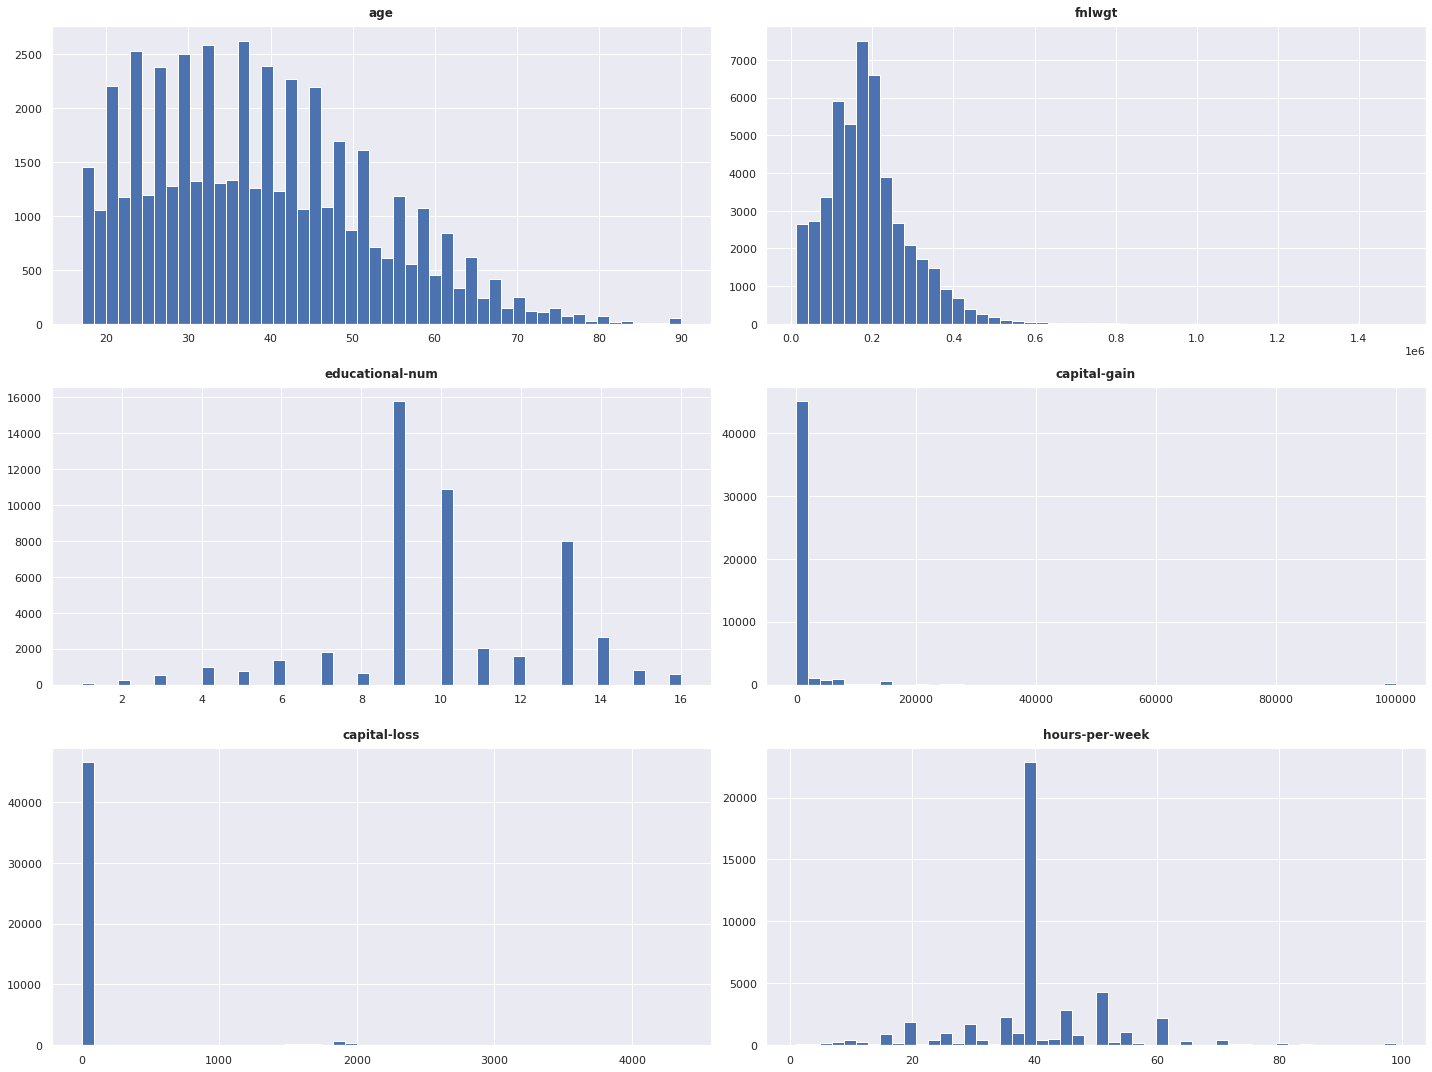

In [101]:
colors  = {'<=50K': 'red', '>50K': 'yellow'}
data[var_numerical].hist(bins=50 , figsize=(20,15) ) # histogram


from pandas.plotting import scatter_matrix


colors  = {'<=50K': 'red', '>50K': 'yellow'}
#scatter_matrix(data[var_numerical] , c=data['income'].map(colors), figsize=(12, 8))


sns.set()
sns.pairplot(data[var_numerical], size = 2.5)
plt.show();

### Matrix de Correlación 

Muestra la correlación de las variables con respecto a la variable a predecir.Notamos, que existe una mayor relacion para valores más cercano a 1.


In [102]:
conv  = {'<=50K': 0, '>50K': 1}
data['tramoClass'] = data['income'].map(conv) 

corr_matrix = data.corr()
corr_matrix["tramoClass"].sort_values(ascending=False)

tramoClass         1.000000
educational-num    0.332613
age                0.230369
hours-per-week     0.227687
capital-gain       0.223013
capital-loss       0.147554
fnlwgt            -0.006339
Name: tramoClass, dtype: float64

La siguiente figura muestra que existe correspondencia entre años de educación sobre los 12 y mayores ingresos, los cuales se agrupan en un rango de edad  aproximadamente desde los 30 a los 70. Lo anterior, reafirma el resultado de la  matrix de correlación, con respecto a los años de educación.



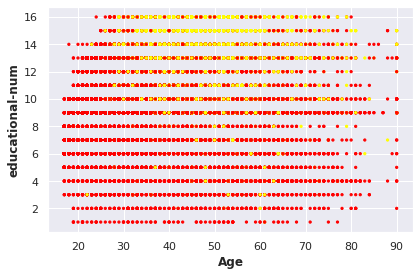

<Figure size 432x288 with 0 Axes>

In [103]:
colors  = {'<=50K': 'red', '>50K': 'yellow'}

sns.set()
data.plot.scatter( x="age" ,y="educational-num",cmap='viridis' ,  c=data["income"].map(colors) ,s=5); 
plt.xlabel("Age")
plt.figure()
plt.show()

### Variables Object

Histogramas para cada una de las variables Object.

# Preprocesamiento de los datos.

In [175]:
def clean(df):
    df = df.drop([ 'education', 'tramoClass'], axis=1) # columnas rebundantes
    return df

def preproceso(df ):
    df = clean(df)
    #df = encode(df)
    df = balance(df) #  low performace
    
    Y = df['income'] 
    X = df.drop('income', axis=1)
    
    trainX ,  testX , Ytrain , Ytest  = train_test_split(X , Y ,  test_size = 0.25 ,random_state = 2 )
   

    var_obj = X.select_dtypes(["object"]).columns.drop(['native-country'])
    var_num = X.select_dtypes(["int"]).columns
    
    numerical_pipeline = Pipeline([('std_scaler', StandardScaler())] )
    
    #dummies_pipeline = Pipeline([('get_dummy', get_dummies(X['native-country']) )] )

    
    full_pipeline = ColumnTransformer([("num", numerical_pipeline, var_num),
                                       ("cat", OneHotEncoder(), var_obj),
                                      # ("dummy", dummies_pipeline, ['native-country']),
                                      ])
    
    traindf = pd.concat([trainX, testX])


    Xtest = full_pipeline.fit_transform(testX)  
    Xtrain = full_pipeline.fit_transform(trainX)  

    return Xtrain, Ytrain ,  Xtest, Ytest





In [151]:
def encode(df):
    conv  = {'<=50K': 0, '>50K': 1}
    df["income"]= df['income'].map(conv)
    return df
    

In [152]:
from sklearn.utils import resample

def balance(X):
    df = encode(X)
    
    Xtramo1 = df[df.income == 0]
    Xtramo2 = df[df.income == 1]
    num_tramo1 = Xtramo1.shape[0]
    num_tramo2 = Xtramo2.shape[0]

    XDownSample = resample(Xtramo1,
                           replace = False, # sample without replacement
                           n_samples = num_tramo2,
                           random_state =1 
                                     )
    
    return  pd.concat([XDownSample , Xtramo2] )




sns.countplot(x='income', data= balance(data) )
print( balance(data)['income'].value_counts())

In [174]:
Xtrain , Ytrain , Xtest , Ytest = preproceso(data)

(17530, 13)   (5844, 13)
Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'gender'],
      dtype='object') 

Index(['age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')  

Index(['age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')  

(17530, 50)   (5844, 50)


# Modelo

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC


In [155]:
SGDClf = SGDClassifier(random_state=42)
LRClf = LogisticRegression(random_state=0, max_iter=1000)
RFClf = RandomForestClassifier(random_state=0)
SVClf = LinearSVC(random_state=0, max_iter=5000)

In [156]:
SGDClf.fit(Xtrain, Ytrain) # fit equal training

RFClf.fit(Xtrain, Ytrain) # fit equal training

LRClf.fit(Xtrain, Ytrain) # fit equal training

SVClf.fit(Xtrain, Ytrain) # fit equal training

LinearSVC(max_iter=5000, random_state=0)

In [157]:
models = [SGDClf,  LRClf,  RFClf , SVClf ]

In [158]:
def compareModels(models, x, y, numCV, scoringT="f1_micro"):
    modelsCV = dict()
    for mod in models:
        scores = cross_val_score(mod, x, y, scoring = scoringT, cv=numCV)
        #meanScore = np.sqrt(-scores).mean()
        meanScore = scores.mean()
        modelsCV[meanScore] = mod
    
    val=max(modelsCV)
    bestModel = modelsCV[val]
    return modelsCV,bestModel


    
result, model =compareModels(models , Xtrain , Ytrain , 6)


In [176]:
 print(result); print('\n'); print('Best Model:', model)

{0.8163152810300106: SGDClassifier(random_state=42), 0.8216771398129291: LogisticRegression(max_iter=1000, random_state=0), 0.8229328668083081: RandomForestClassifier(random_state=0), 0.8220192539989283: LinearSVC(max_iter=5000, random_state=0)}


Best Model: RandomForestClassifier(random_state=0)


# Refinamiento del Modelo

In [121]:
gridSGD = { 
    'max_iter': [1000,1200, 800, 1500, 2000],
    'alpha':[0.0001 , 0.00005, 0.0005, 0.00001],
    'fit_intercept' :[True, False],
    'learning_rate' : ['optimal', 'adaptive', 'invscaling'],
    'eta0' : [0.1, 0.5 , 0.05, 0.01]  ,                 
    'random_state' : [18,6],
    'early_stopping' : [True, False],
}

randomgrid = {'n_estimators':[100, 300], 
                'max_features':["sqrt", 'log2'] ,
               'criterion' : ["entropy", "gini"],
               'bootstrap':[False, True], 
             }

clf=RandomizedSearchCV( model , randomgrid,
                cv=3,  scoring='f1_micro' , return_train_score=True) # arg (model , distri , ...)

clf.fit( Xtrain, Ytrain)


clf.best_params_ 

In [159]:
RFClf = RandomForestClassifier(  n_estimators = 300,
                               max_features =  'sqrt',
                               criterion =  'gini' ,
                               bootstrap =  True ,
                               random_state=0  )
RFClf.fit(Xtrain, Ytrain)


RandomForestClassifier(max_features='sqrt', n_estimators=300, random_state=0)

In [177]:
YpredCLF= RFClf.predict(Xtest) 

In [180]:
from sklearn.metrics import  f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay,  SCORERS


score = f1_score(
    Ytest,
    YpredCLF,
 #   labels=labels,
    average='micro',
)

print("Score F1:" , score)

Score F1: 0.8073237508555784


In [149]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

[[2297  646]
 [ 480 2421]]


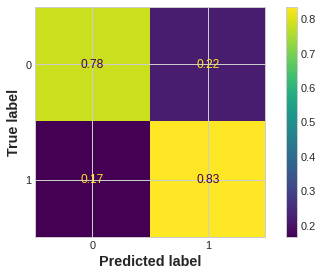

In [173]:
labels= ModelCLF.classes_


cmat = confusion_matrix(
    Ytest,
    YpredCLF,
    labels=labels,
    #average='micro',

)

print(cmat)
cmat = (cmat.T / cmat.sum(axis=1)).T # normalize


disp = ConfusionMatrixDisplay(confusion_matrix=cmat,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

Notamos en la Matrix de Correlación un balance en la predicción. 